In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
#loading data
fraud = pd.read_csv("Fraud.csv")
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
#number of rows and columns
fraud.shape

(6362620, 11)

# Data Cleaning

**missing values**

In [4]:
#checking for the presence of null values or not
fraud.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
#Exploring transaction type
fraud.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

**Quantitative Analysis**

**Checking and removing Outliers**

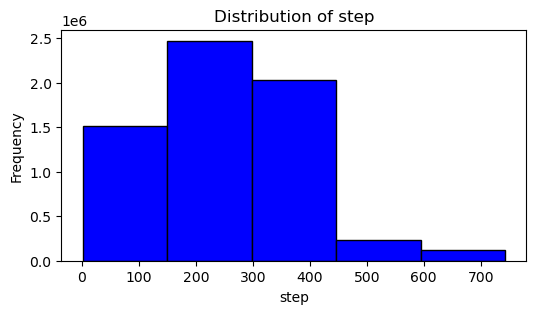

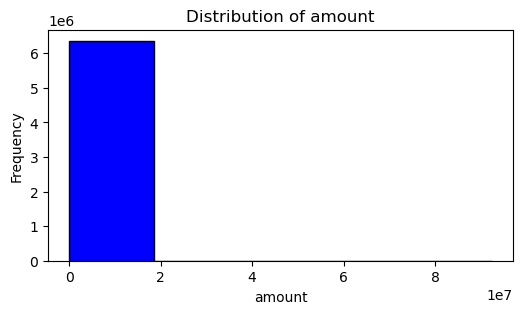

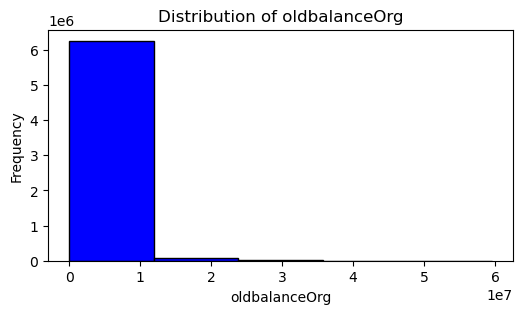

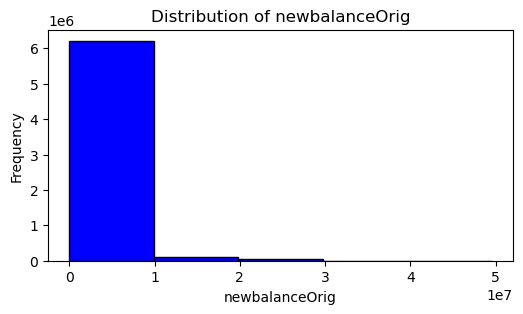

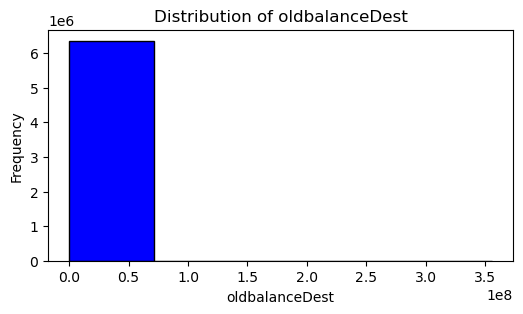

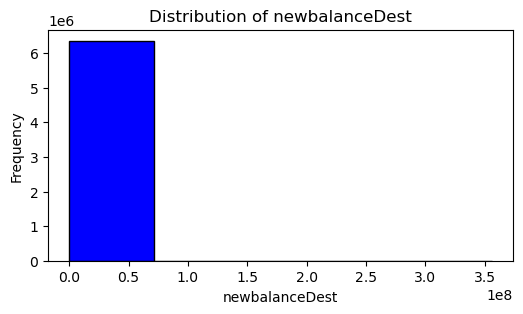

In [6]:
feature=['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    plt.xlabel(i)
    fraud[i].plot(kind='hist', bins=5, figsize=(6,3), facecolor='blue',edgecolor='black')
    plt.title(f"Distribution of {i}")
    plt.show()

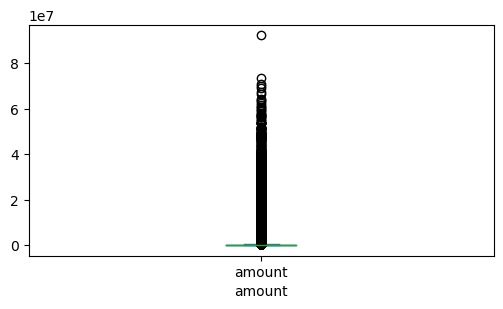

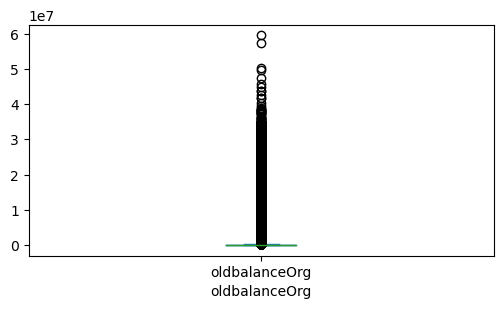

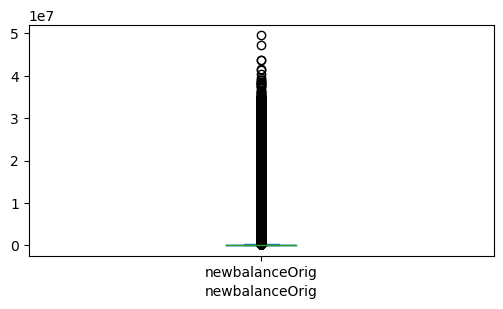

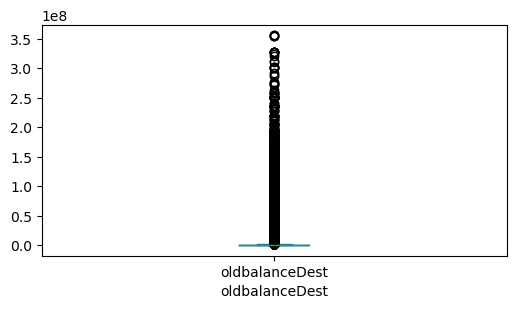

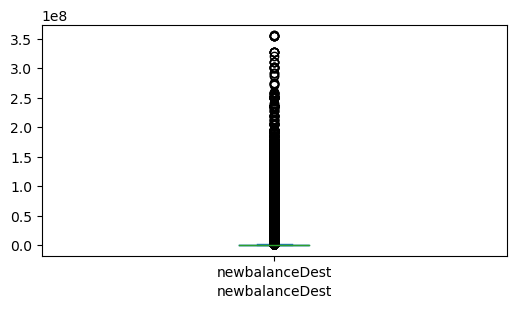

In [7]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    plt.xlabel(i)
    fraud[i].plot(kind='box', figsize=(6,3))
    plt.show()

**Observations**

Features are highly skewed except step column, there must be outliers in data

In [8]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    lower = fraud[i].quantile(0.10)
    upper = fraud[i].quantile(0.90)
    fraud[i] = np.where(fraud[i] <lower, lower,fraud[i])
    fraud[i] = np.where(fraud[i] >upper, upper,fraud[i])
    print('Feature: ',i)
    print('Skewness value: ',fraud[i].skew())
    print('\n')

Feature:  amount
Skewness value:  0.8046460444556197


Feature:  oldbalanceOrg
Skewness value:  2.249361299814406


Feature:  newbalanceOrig
Skewness value:  2.2262847493216786


Feature:  oldbalanceDest
Skewness value:  1.4173123924260833


Feature:  newbalanceDest
Skewness value:  1.3593024983493058




**Distribution after removing outliers**

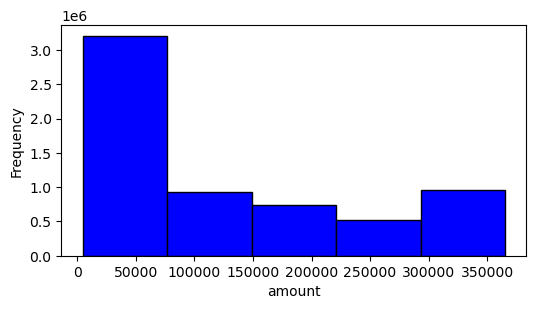

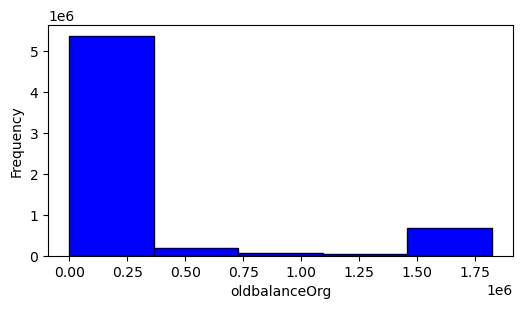

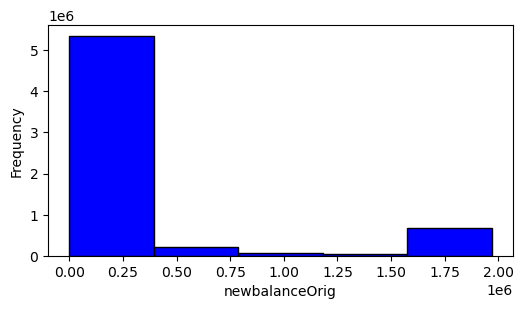

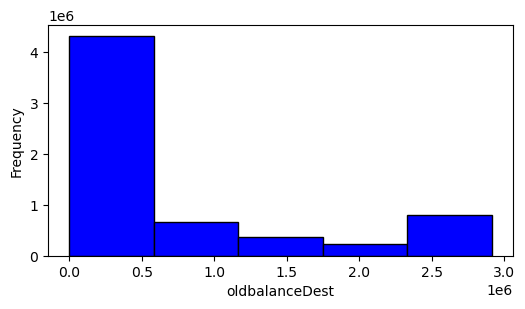

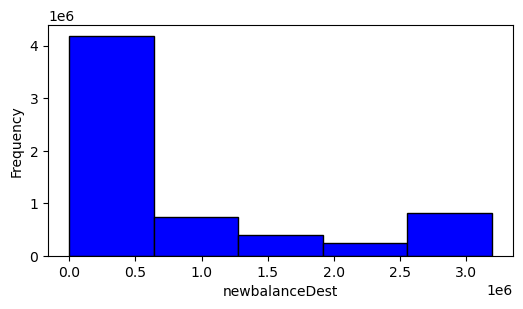

In [9]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    plt.xlabel(i)
    fraud[i].plot(kind='hist', bins=5, figsize=(6,3), facecolor='blue',edgecolor='black')
    plt.show()

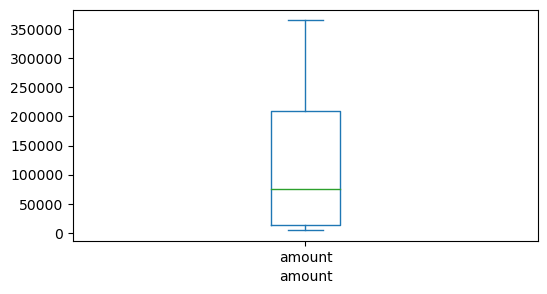

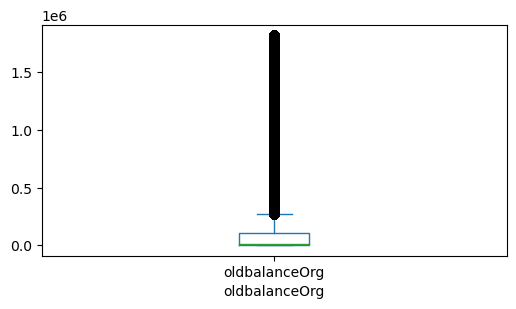

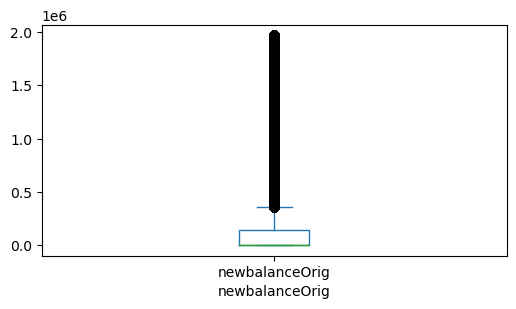

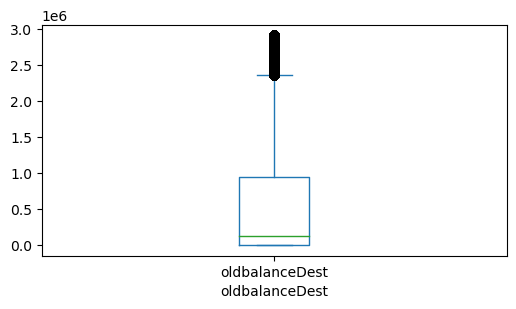

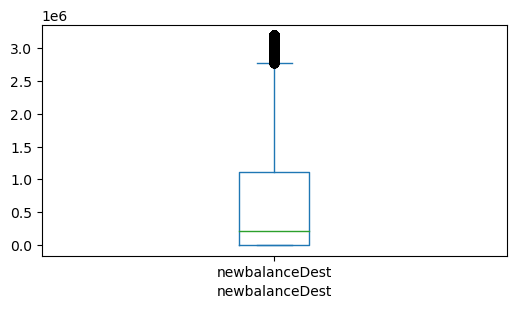

In [10]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    plt.xlabel(i)
    fraud[i].plot(kind='box',figsize=(6,3))
    plt.show()

**Checking for correlation**

<AxesSubplot:>

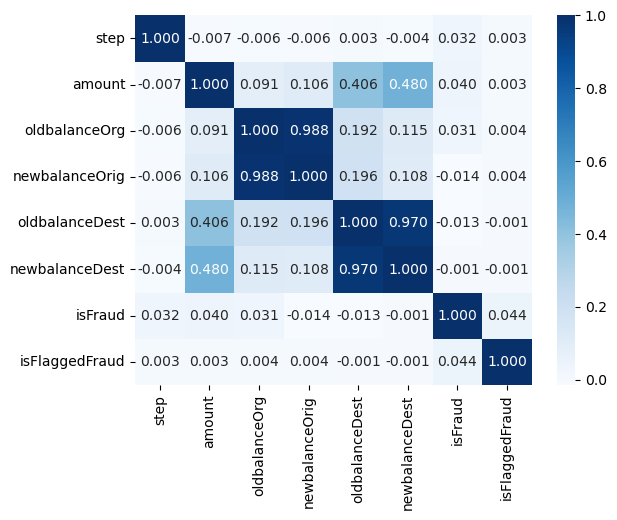

In [11]:
#calculate correlation matrix
corr = fraud.corr()
# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='Blues' ,fmt=".3f")

# **Fraud Detection Model Elaboration:**

1. **Data Preparation:**
   - **Feature Engineering:** In fraud detection, you typically have a dataset with various features (x) and a binary target variable (y), where y=1 indicates a fraud case and y=0 indicates a legitimate transaction. Feature engineering involves selecting, transforming, and creating relevant features from the raw data.
   - **Data Splitting:** The dataset is divided into two parts: the training set (xtrain, ytrain) and the testing set (xtest, ytest) to evaluate the model's performance.

2. **Model Selection:**
   - I'm considering a Decision Tree Classifier as the model. Decision trees are a common choice for fraud detection because they can capture complex patterns in the data. However, other algorithms like Random Forests, Gradient Boosting, or even deep learning models can also be used depending on the dataset and problem complexity.

3. **Model Training:**
   - The `model.fit(xtrain, ytrain)` line trains the Decision Tree Classifier on the training data, where the model learns to identify patterns and make predictions based on the features provided.

4. **Model Evaluation:**
   - The `model.score(xtest, ytest)` line calculates the accuracy of the model on the testing data. While accuracy is a useful metric, it's not always sufficient for fraud detection because fraud cases are often rare compared to legitimate ones. Therefore, additional evaluation metrics such as precision, recall, F1-score, and ROC-AUC are important to consider.
   
5. **Prediction:**
   - Using the trained fraud detection model (in this case, the Decision Tree Classifier), I will pass the preprocessed 'x' variable data to the model's prediction function. The model evaluates the features and provides a prediction, typically as a probability or a binary classification result - when I'm using the Decision Tree Classifier, the model may return a class label (1 for fraud, 0 for legitimate)

**Feature Engineering**

In [12]:
# Now let’s transform the categorical features into numerical. Here we will also transform the values of the isFraud column into 
# No Fraud and Fraud labels to have a better understanding of the output
# Changing CASH_OUT to 1, PAYMENT to 2, CASH_IN to 3, TRANSFER to 4 and DEBIT to 5 

fraud["type"] = fraud["type"].map({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5})
fraud["isFraud"] = fraud["isFraud"].map({0: "No Fraud", 1: "Fraud"})
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,No Fraud,0
1,1,2,4501.30,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,No Fraud,0
2,1,4,4501.30,C1305486145,181.0,0.00,C553264065,0.0,0.0,Fraud,0
3,1,1,4501.30,C840083671,181.0,0.00,C38997010,21182.0,0.0,Fraud,0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,No Fraud,0


**Data Splitting**

In [13]:
# splitting the data
x = np.array(fraud[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(fraud[["isFraud"]])

The considered variables for **x** makes sense as the columns **type,amount, oldbalanaceOrg, newbalanceOrg** has information for all customer whereas columns such as oldbalanceDest, newbalanceDest do not have information for customers that start with M (Merchants).

The variable considered for **y** is **isFraud** because,this is the transactions made by the fraudulent agents inside the simulation. Whereas,if we consider isFlaggedFraud the attribute is described to be "An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction" which doesn't seem right because The amount range usually fraudsters target is aroung 1-4 lakhs which is certainly a large sum.

**Model Selection**

In [14]:
model = DecisionTreeClassifier()

**Model Training**

In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.75, random_state=24)
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

**Model Evaluation**

In [16]:
model.score(xtest, ytest)

0.9992661304095902

**Prediction**

In [17]:
#features = [type, amount, oldbalanceOrg, newbalanceOrig]
#CASH_OUT to 1, PAYMENT to 2, CASH_IN to 3, TRANSFER to 4 and DEBIT to 5 

features = np.array([[5, 8900.2, 8990.2, 0.0]])
model.predict(features)

array(['No Fraud'], dtype=object)

# Key factors that predict fraudulent customer are:

-TRANSFER and CASH_OUT transactions are more likely to be associated with fraud.

# These factors make sense because

-Balance Changes (oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest): Sudden and unexplained changes in account balances, especially when they don't match transaction amounts, can be suspicious.

-Unusually high transaction amounts, especially in TRANSFER and CASH_OUT transactions, can be a strong indicator of fraud.


-Flagged as Fraud (isFraud): This column directly indicate whether a transaction was flagged as fraudulent or not.

# Kind of prevention should be adopted while company update its infrastructure

**Monitoring and Detection:**
Implement continuous monitoring and detection systems to identify suspicious activities and potential security breaches in real-time. Utilize security information and event management (SIEM) solutions.

**Regular Security Updates and Training:**
Continuously update security measures, tools, and training to stay ahead of evolving fraud tactics and threats.

**Network Security:**
Secure the network infrastructure with firewalls, intrusion detection systems, and intrusion prevention systems. Implement network segmentation to limit lateral movement in case of a breach.

**Data Encryption:**
Ensure that data at rest and data in transit are encrypted to protect sensitive information from unauthorized access. Use encryption protocols such as HTTPS, TLS, and strong encryption algorithms.

**Access Control:**
Implement strict access control measures to ensure that only authorized personnel have access to the infrastructure and sensitive data. Use strong authentication methods, such as multi-factor authentication (MFA).

#  After these actions have been implemented, I determine if they work by following data

**Incident Monitoring and Response:**
Monitor security incidents and fraud attempts over time. An increase in the number of incidents or a decrease in their severity can indicate that the implemented measures are working.

**Reduction in Incidents:**
Measure the reduction in the number of successful fraud incidents or security breaches compared to the period before implementing the preventive measures.


**False Positive Rate:**
Assess the false positive rate of your fraud detection systems. A high false positive rate can indicate that legitimate transactions are being mistakenly flagged as fraudulent.